In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [58]:
data = pd.read_csv('C:/data/machine_learning_data/Social_Network_Ads.csv').values
data.shape

(400, 3)

In [59]:
x = data[:,:-1]
y = data[:,-1]

In [60]:
print(x.shape,y.shape)

(400, 2) (400,)


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [62]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(280, 2) (120, 2)
(280,) (120,)


In [63]:
# KNN은 스케일링 필수
# 예를 들어 y 축에 비해 x축이 너무 범위가 좁다면 x축이 무시될 수 있음
# 거리 개념이 반영되는 경우, 스케일링이 필요함
# 특히 두 특성 간 값의 차이가 큰 경우 (age:60/18,salary:150000,15000)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x)
# fit은 training data만 적용
xsc_train = sc.transform(x_train)

print(x_train)
print(xsc_train)

[[    27  31000]
 [    35  71000]
 [    49  28000]
 [    35  91000]
 [    37  75000]
 [    32 117000]
 [    36  75000]
 [    20  86000]
 [    38  50000]
 [    49  36000]
 [    40  65000]
 [    37  77000]
 [    60  46000]
 [    48 138000]
 [    40  71000]
 [    36  63000]
 [    26  81000]
 [    33  31000]
 [    41  51000]
 [    46  74000]
 [    18  82000]
 [    37  33000]
 [    35  53000]
 [    28  59000]
 [    37  71000]
 [    18  44000]
 [    38  61000]
 [    35  65000]
 [    31  66000]
 [    47  25000]
 [    42 104000]
 [    19  19000]
 [    21  72000]
 [    28  32000]
 [    52 150000]
 [    53 104000]
 [    25  80000]
 [    26  72000]
 [    26  15000]
 [    40 142000]
 [    35  38000]
 [    57 122000]
 [    41  87000]
 [    24  89000]
 [    37  52000]
 [    35 108000]
 [    32 100000]
 [    35 147000]
 [    19  26000]
 [    46  82000]
 [    47 105000]
 [    45  45000]
 [    38  51000]
 [    37  93000]
 [    29  43000]
 [    41  30000]
 [    40  60000]
 [    27  88000]
 [    27  9000

In [64]:
print(x_train.mean(axis=0))
# 각 열의 평균: 약 37세, 약 69,000달러
# age는 37에 가까울 수록, Salary는 69000에 가까울 수록 0에 가까움

[3.71000000e+01 6.90571429e+04]


In [65]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 5,weights='uniform')
# n_neighbors = k(클래스를 확인할 이웃 데이터의 수)
# weights = uniform -> 동일한 가중치, distance -> 가까운 이웃에 더 큰 가중치
# p = 2, metric = 'minkowski' -> Euclidean distance를 사용한다는 의미
kn.fit(xsc_train,y_train)


KNeighborsClassifier()

In [66]:
xsc_test = sc.transform(x_test) # x_test도 스케일링 해야함

In [67]:
pred = kn.predict(xsc_test)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred) # 실제 값과 예측 값 정확도

0.875

In [70]:
train_pred = kn.predict(xsc_train)
test_pred = kn.predict(xsc_test)
train_acc = accuracy_score(y_train,train_pred)
test_acc = accuracy_score(y_test,test_pred)
print(train_acc) # 훈련 데이터 정확도
print(test_acc) # 테스트 데이터 정확도

0.9357142857142857
0.875


In [71]:
# under fitting : 훈련, 테스트 모두 정확도 낮음
# over fitting : 훈련 데이터는 정확도 높지만 테스트는 상대적으로 낮음
# n_neighbors(k)의 값 변경해 정확도 비교할 것

In [75]:
# y값이 0인 x_test data와 1인 x_test data 분리
# ndarray[조건식]: 조건식이 참인 ndarray의 행을 반환
x0_test= x_test[y_test == 0,:]
x1_test= x_test[y_test == 1,:]
print(x0_test.shape)
print(x1_test.shape)

(72, 2)
(48, 2)


In [76]:
x0_test_pred= x_test[test_pred == 0,:]
x1_test_pred= x_test[test_pred == 1,:]
print(x0_test_pred.shape)
print(x1_test_pred.shape)

(65, 2)
(55, 2)


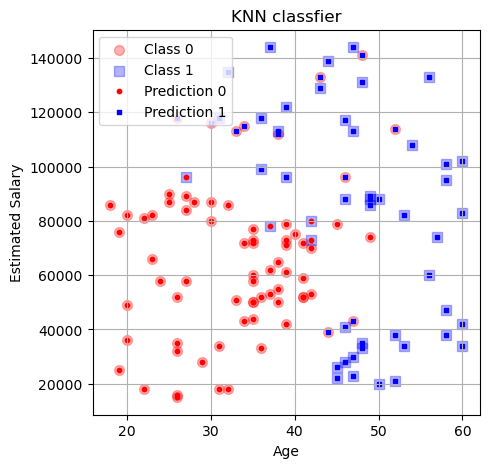

In [96]:
plt.figure(figsize=(5,5))
plt.scatter(x0_test[:,0],x0_test[:,1],color='red',marker='o',s=50,alpha=0.3,label='Class 0') # label이 0
plt.scatter(x1_test[:,0],x1_test[:,1],color='blue',marker='s', s=50,alpha=0.3,label='Class 1') # label이 1
# alpha는 투명도를 의미
plt.scatter(x0_test_pred[:,0],x0_test_pred[:,1],color='red',marker='o',s=10,label = 'Prediction 0')
plt.scatter(x1_test_pred[:,0],x1_test_pred[:,1],color='blue',marker='s',s=10, label = 'Prediction 1')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('KNN classfier')
plt.grid()